### Question 1 Can you think of a few applications for each type of RNN, a sequence-to-sequence RNN, a sequence-to-vector RNN,  a vector-to-sequence RNN, and a vector-to-vector RNN?

#### Applications of each type of RNN are:
1.**A sequence to sequence** : This type of RNN used in time series prediction like weather prediction, stock price prediction
2. **A sequence to vector** : Sentiment analysis probably is one the most common applications in Natural Language processing. Sentiment Analysis can be done to get the review of the user, classifying music samples, predicting the probability that a user will watch a movie based on his/her watch history
3. **A vector to a sequence** : Captioning image, generating music, locating pedestrians on a footpath
4. **A vector to vector RNN** : Combing both sequence to vector(encoder) and vector to sequence(decoder) can be used in language or machine translation.The Encoder-Decoder architecture with recurrent neural networks has become an effective and standard approach for both neural machine translation (NMT) and sequence-to-sequence (seq2seq) prediction in general.The key benefits of the approach are the ability to train a single end-to-end model directly on source and target sentences and the ability to handle variable length input and output sequences of text

### Question 2: How many dimensions are required for input of an RNN layer? Can you use some examples to illustrate what are these dimensions and their purposes? How about the dimensions of the RNN output? 

An RNN layer must have three-dimensional inputs: the first dimension is the batch dimension (its size is the batch size), the second dimension represents the time (its size is the number of time steps), and the third dimension holds the inputs at each time step (its size is the number of input features per time step). For example, if you want to process a batch containing 10 time series of 20 time steps each, with 2 values per time step (e.g., the temperature and the wind speed), the shape will be [10, 20, 2]. The outputs are also three-dimensional, with the same first two dimensions, but the last dimension is equal to the number of neurons. For example, if an RNN layer with 30 neurons processes the batch we just discussed, the output will have a shape of [10, 20, 30].

### Question 3: Gated Recurrent Unit (GRU) is another kind of neuron which can perform memory retention as LSTM, could you explain this and compare this with LSTM

In Recurrent Neural Networks,Gated recurrent units (GRUs) are a gating mechanism , introduced by Kyunghyun in 2014. The GRU is like a long short-term memory (LSTM) with a forget gate,but has fewer parameters than LSTM, as it lacks an output gate. GRU's performance on certain tasks of speech signal modelling, polyphonic music modeling, and natural language processing was found to be similar to that of LSTM as work by leveraging the same principle as LSTM, but they are somewhat streamlined and thus cheaper to run, in spite of the fact that they may not have quite as much representational power as LSTM. In machine learning, this trade-off between computational expensiveness and representational power is seen everywhere . Unlikely LSTM, GRU tries to implement fewer gates and thus helps in reducing the computational cost.

Comaparison with LSTM:

LSTM:

- LSTM has three gates (namely input, output and forget gates).
-  LSTMs when trained with more data give you better results than GRUs.
- The gradients in LSTM can still vanish in case of forward propagation.LSTM doesn’t solve the problem of exploding gradient, therefore we use gradient clipping
- LSTMs are preferred when sequence lengths are more and some good context is there.


GRU:

- GRU has two gates (reset and update gates)
- GRUs train faster and perform better on less training data
- GRU, has output gate that controls the proportion of information that will be passed to the next hidden state, besides, it has an input gate that controls information flow from current input
- GRUs are generally used when you do have long sequence training samples and you want a quick and decent accuracy and maybe in cases where infrastructure is an issue


### Question 4 : can you try to modify RNN model to improve performance, e.g., improve accuracy to 95%? For example, we may change the number of units in each recurrent layer, adjust the learning rate or change optimizer, or try using LSTM layers instead of GRU layers.

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential
import numpy as np
# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words (among top max_features most common words)
maxlen = 500

# Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 0s 0us/step


In [2]:
y_train.shape
print(type(x_train))

<class 'numpy.ndarray'>


In [3]:
x_train[-1]

[1,
 17,
 6,
 194,
 337,
 7,
 4,
 204,
 22,
 45,
 254,
 8,
 106,
 14,
 123,
 4,
 2,
 270,
 2,
 5,
 2,
 2,
 732,
 2098,
 101,
 405,
 39,
 14,
 1034,
 4,
 1310,
 9,
 115,
 50,
 305,
 12,
 47,
 4,
 168,
 5,
 235,
 7,
 38,
 111,
 699,
 102,
 7,
 4,
 4039,
 9245,
 9,
 24,
 6,
 78,
 1099,
 17,
 2345,
 2,
 21,
 27,
 9685,
 6139,
 5,
 2,
 1603,
 92,
 1183,
 4,
 1310,
 7,
 4,
 204,
 42,
 97,
 90,
 35,
 221,
 109,
 29,
 127,
 27,
 118,
 8,
 97,
 12,
 157,
 21,
 6789,
 2,
 9,
 6,
 66,
 78,
 1099,
 4,
 631,
 1191,
 5,
 2642,
 272,
 191,
 1070,
 6,
 7585,
 8,
 2197,
 2,
 2,
 544,
 5,
 383,
 1271,
 848,
 1468,
 2,
 497,
 2,
 8,
 1597,
 8778,
 2,
 21,
 60,
 27,
 239,
 9,
 43,
 8368,
 209,
 405,
 10,
 10,
 12,
 764,
 40,
 4,
 248,
 20,
 12,
 16,
 5,
 174,
 1791,
 72,
 7,
 51,
 6,
 1739,
 22,
 4,
 204,
 131,
 9]

In [4]:
# Reverse sequences
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]


In [5]:
len(x_train[24999])

153

In [6]:
n = [1,2,3]
print(n[::-1])
n = [n[::-1] for x in n]
print(n)

[3, 2, 1]
[[3, 2, 1], [3, 2, 1], [3, 2, 1]]


In [7]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

### Building a simple RNN model with LSTM hidden layers

In [8]:
model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 72s 461ms/step - loss: 0.5025 - acc: 0.7567 - val_loss: 0.5390 - val_acc: 0.7732
Epoch 2/10
157/157 [==============================] - 74s 472ms/step - loss: 0.3140 - acc: 0.8775 - val_loss: 0.3264 - val_acc: 0.8718
Epoch 3/10
157/157 [==============================] - 75s 475ms/step - loss: 0.2545 - acc: 0.9058 - val_loss: 0.3857 - val_acc: 0.8486
Epoch 4/10
157/157 [==============================] - 76s 486ms/step - loss: 0.2232 - acc: 0.9198 - val_loss: 0.3292 - val_acc: 0.8750
Epoch 5/10
157/157 [==============================] - 74s 474ms/step - loss: 0.1901 - acc: 0.9316 - val_loss: 0.3890 - val_acc: 0.8800
Epoch 6/10
157/157 [==============================] - 81s 513ms/step - loss: 0.1698 - acc: 0.9399 - val_loss: 0.3515 - val_acc: 0.8634
Epoch 7/10
157/157 [==============================] - 75s 476ms/step - loss: 0.1558 - acc: 0.9466 - val_loss: 0.4308 - val_acc: 0.8588
Epoch 8/10
157/157 [==============================] - 8

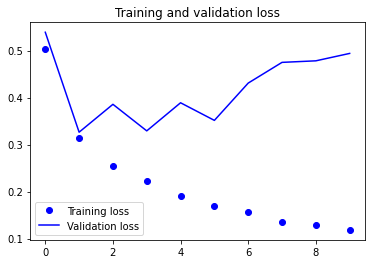

In [10]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [12]:
print(scores)

[0.5511319041252136, 0.8515999913215637]


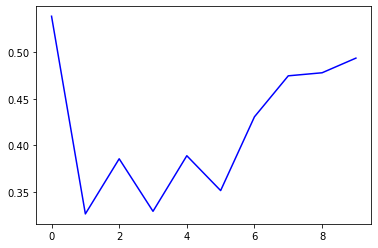

In [14]:
accuracy = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label = 'Accuracy')
plt.show()

### Using Bi-directional RNN instead of LSTM for to improve the Accuracy rate

### Tweaking the parameters, by changing the batch size and loss function  

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(64)))
#model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mae', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 97s 309ms/step - loss: 0.3670 - acc: 0.6547 - val_loss: 0.2214 - val_acc: 0.8100
Epoch 2/10
313/313 [==============================] - 95s 305ms/step - loss: 0.3252 - acc: 0.6802 - val_loss: 0.2079 - val_acc: 0.7904
Epoch 3/10
313/313 [==============================] - 96s 308ms/step - loss: 0.1762 - acc: 0.8256 - val_loss: 0.1530 - val_acc: 0.8478
Epoch 4/10
313/313 [==============================] - 94s 299ms/step - loss: 0.1636 - acc: 0.8382 - val_loss: 0.2113 - val_acc: 0.7890
Epoch 5/10
313/313 [==============================] - 94s 299ms/step - loss: 0.1910 - acc: 0.8092 - val_loss: 0.1957 - val_acc: 0.8040
Epoch 6/10
313/313 [==============================] - 94s 301ms/step - loss: 0.1864 - acc: 0.8138 - val_loss: 0.1379 - val_acc: 0.8618
Epoch 7/10
313/313 [==============================] - 96s 305ms/step - loss: 0.1625 - acc: 0.8384 - val_loss: 0.1544 - val_acc: 0.8460
Epoch 8/10
313/313 [==============================] - 1

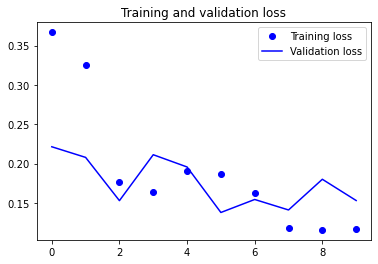

Accuracy [0.654699981212616, 0.6801999807357788, 0.8255500197410583, 0.8381999731063843, 0.8091999888420105, 0.8138499855995178, 0.8384000062942505, 0.8834499716758728, 0.8858000040054321, 0.8834499716758728]
Validation accuracy [0.8100000023841858, 0.7904000282287598, 0.8478000164031982, 0.7889999747276306, 0.8040000200271606, 0.8618000149726868, 0.8460000157356262, 0.8600000143051147, 0.8198000192642212, 0.8468000292778015]


In [ ]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
print('Accuracy', history.history['acc'])
print('Validation accuracy', history.history['val_acc'])

### Although the above model performs better; to furthur enhance the accuracy we changed the loss back to binary cross entropy and batch size =128 with bidirectional RNN layers

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(64)))
#model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 85s 542ms/step - loss: 0.5695 - acc: 0.7121 - val_loss: 0.4712 - val_acc: 0.7820
Epoch 2/10
157/157 [==============================] - 86s 546ms/step - loss: 0.3940 - acc: 0.8398 - val_loss: 0.4090 - val_acc: 0.8280
Epoch 3/10
157/157 [==============================] - 88s 559ms/step - loss: 0.3185 - acc: 0.8809 - val_loss: 0.4489 - val_acc: 0.8434
Epoch 4/10
157/157 [==============================] - 1128s 7s/step - loss: 0.2585 - acc: 0.9054 - val_loss: 0.3321 - val_acc: 0.8648
Epoch 5/10
157/157 [==============================] - 84s 538ms/step - loss: 0.2226 - acc: 0.9192 - val_loss: 0.3580 - val_acc: 0.8484
Epoch 6/10
157/157 [==============================] - 85s 541ms/step - loss: 0.2008 - acc: 0.9312 - val_loss: 0.4105 - val_acc: 0.8672
Epoch 7/10
157/157 [==============================] - 83s 530ms/step - loss: 0.1747 - acc: 0.9370 - val_loss: 0.3508 - val_acc: 0.8736
Epoch 8/10
157/157 [==============================] - 83

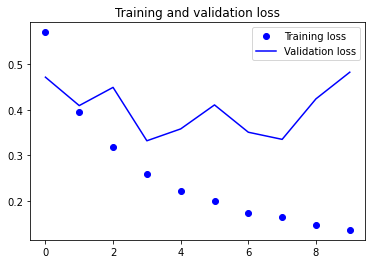

In [ ]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
print('Accuracy', history.history['acc'])
print('Validation accuracy', history.history['val_acc'])

Accuracy [0.7121000289916992, 0.8398000001907349, 0.8809000253677368, 0.9053999781608582, 0.9192000031471252, 0.9312499761581421, 0.9369500279426575, 0.9430000185966492, 0.9500499963760376, 0.9526000022888184]
Validation accuracy [0.7820000052452087, 0.828000009059906, 0.8434000015258789, 0.864799976348877, 0.8483999967575073, 0.8672000169754028, 0.8736000061035156, 0.8637999892234802, 0.8831999897956848, 0.8582000136375427]


### As we can see,the validation loss is too high; now examining by increasing the number of epochs. Increasing the number of epochs improved the accuracy but on the other hand, increased the validation loss also

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(64)))
#model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 93s 592ms/step - loss: 0.5596 - acc: 0.7207 - val_loss: 0.5074 - val_acc: 0.7760
Epoch 2/20
157/157 [==============================] - 88s 563ms/step - loss: 0.3553 - acc: 0.8629 - val_loss: 0.4594 - val_acc: 0.8054
Epoch 3/20
157/157 [==============================] - 89s 564ms/step - loss: 0.2801 - acc: 0.8956 - val_loss: 0.4009 - val_acc: 0.8458
Epoch 4/20
157/157 [==============================] - 107s 679ms/step - loss: 0.2428 - acc: 0.9139 - val_loss: 0.4280 - val_acc: 0.8716
Epoch 5/20
157/157 [==============================] - 100s 640ms/step - loss: 0.2168 - acc: 0.9215 - val_loss: 0.5341 - val_acc: 0.7610
Epoch 6/20
157/157 [==============================] - 118s 753ms/step - loss: 0.1936 - acc: 0.9299 - val_loss: 0.3290 - val_acc: 0.8860
Epoch 7/20
157/157 [==============================] - 111s 706ms/step - loss: 0.1738 - acc: 0.9391 - val_loss: 0.4455 - val_acc: 0.7952
Epoch 8/20
157/157 [==============================]

In [ ]:
import numpy as np
print('Accuracy', np.max(history.history['acc']))
print('Validation accuracy', np.max(history.history['val_acc']))

Accuracy 0.9738500118255615
Validation accuracy 0.8859999775886536


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               49664     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 369,793
Trainable params: 369,793
Non-trainable params: 0
_________________________________________________________________


### By Increasing the number of epochs to 20 we are able to increased the accuracy however it also increased the validation loss; this may be a better model when accuracy is considered but there is an overfitting.It overfits with validation data. However when trained with mean absolute error(MAE) as loss; in spite of getting 85% validation accuracy and 88% training accuracy it performed a fair good job by avoiding overfitting. this scene is again trade off. In this question; we have to focus on improved accuracy and with the above model; it is very clear that model achieved 97.4% training accuracy and 88.6% validation accuracy.

**5. Best problems provided by Talented Students Questions/Answers**

RNN questions:

1.You are training an RNN, and find that your weights and activations are all taking on the value of NaN (“Not a Number”). Which of these is the most likely cause of this problem? A. Vanishing gradient problem. B. Exploding gradient problem.

**Answer: B. Exploding gradient problem.**

2.To which of these tasks would you apply a many-to-one RNN architecture? (Check all that apply) A. Image classification (input an image and output a label) B. Gender recognition from speech (input an audio clip and output a label indicating the speaker’s gender) C. Speech recognition (input an output clip and output a transcript) D. Sentinel classification (input a piece of text and output 0/1 to denote positive or negative sentiment)
**Answer: B & D**

3.1 What is the value of O1?

**Answer: 0.9996**

Solution: h1 = sigmoid (Wih*i/p) = sigmoid (8) = 0.9996 O1 = Who * h1 = 1 * 0.9996= 0.9996 (since o/p has linear activation function)

3.2 what is the value of O2?

**Answer: 0.9819**

Solution: h2 = sigmoid(i/p8+4h1) = sigmoid (08 + 40.9996) = 0.9819 O2 = 1 * h2 = 1* 0.9819 (since o/p has linear activation function)

4.1 What do you think is going on? **Answer: B. Some examples are causing exploding gradients.**

4.2. What do you think is a good fix for this problem?

**Answer: Since exploding gradient is causing the above training loss, gradient clipping can be used to fix the problem. i.e. clipping the gradient below a fixed maximum value**